You have been provided the 'Iris' dataset. You have to predict species of the flowers based on the given features. You have to predict the 'Class' feature, which contains 3 species, namely, Iris-Setosa, Iris-Virginica, and Iris-Versicolor.

The dataset contains 5 features:

sepal length (cm): length of the sepal

sepal width (cm): width of the sepal

petal length (cm): length of the petal

petal width (cm): width of the petal

Class: species of the iris flower

In [1]:
#loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,NaN,1.4,0.2,Iris-Setosa


In [2]:
df.shape

(150, 5)

In [3]:
# checking if dataset has any null values
df.isnull().sum()

sepal length (cm)     0
sepal width (cm)     30
petal length (cm)    68
petal width (cm)      0
Class                 0
dtype: int64

dataset has null value

In [4]:
#handaling null vales
null=pd.DataFrame({'Count':df.isnull().sum(),'Percentage':df.isnull().sum()/df.shape[0]})
null

,Count,Percentage
sepal length (cm),0,0.000000
sepal width (cm),30,0.200000
petal length (cm),68,0.453333
petal width (cm),0,0.000000
Class,0,0.000000


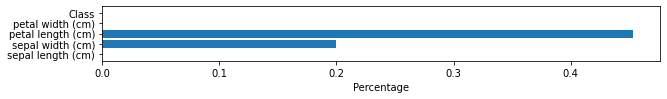

In [5]:
plt.figure(figsize = (10,1))
plt.barh(null.index, null.Percentage)
plt.xlabel('Percentage')
plt.show()

In [6]:
# 'petal length (cm)' has 45.3 % null values 
# so, droping it 
df.drop('petal length (cm)',axis=1,inplace=True)
df.head(2)

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5,0.2,Iris-Setosa
1,4.9,3.0,0.2,Iris-Setosa


In [7]:
# 'sepal width (cm)' has 20% null values so replacing NaN with mean of that column
mean=df['sepal width (cm)'].mean()
df['sepal width (cm)']=df['sepal width (cm)'].fillna(mean).round(1)

In [8]:
df.head(3)

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5,0.2,Iris-Setosa
1,4.9,3.0,0.2,Iris-Setosa
2,4.7,3.2,0.2,Iris-Setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal width (cm)   150 non-null    float64
 3   Class              150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


converting categorical features to numerical values using LabelEncoder

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
print(df.head())
print(df.Class.unique())

   sepal length (cm)  sepal width (cm)  petal width (cm)  Class
0                5.1               3.5               0.2      0
1                4.9               3.0               0.2      0
2                4.7               3.2               0.2      0
3                4.6               3.1               0.2      0
4                5.0               3.1               0.2      0
[0 1 2]


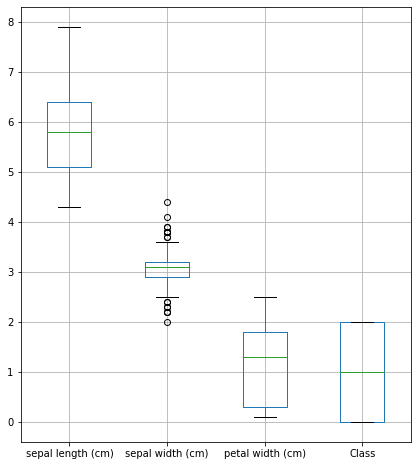

In [11]:
# Checking for Outlier
df.boxplot(figsize=[7,8])
plt.show()

sepal width (cm) contains outlier, need to cap them

In [12]:
q1 = df['sepal width (cm)'].quantile(.25)
q3 = df['sepal width (cm)'].quantile(.75)
IQR = q3 - q1
df['sepal width (cm)']=np.clip(df['sepal width (cm)'],q1-1.5*IQR,q3+1.5*IQR)

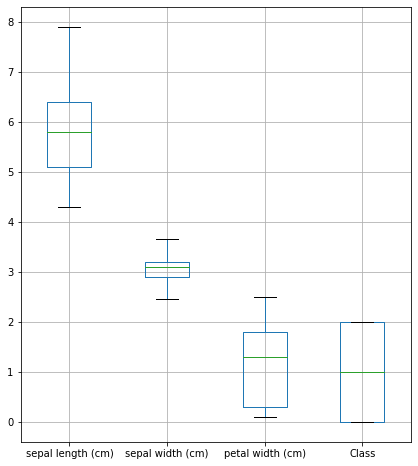

In [13]:
df.boxplot(figsize=[7,8])
plt.show()

now there are no outlier left

ploting correlation and find which feature will help the most while prediction

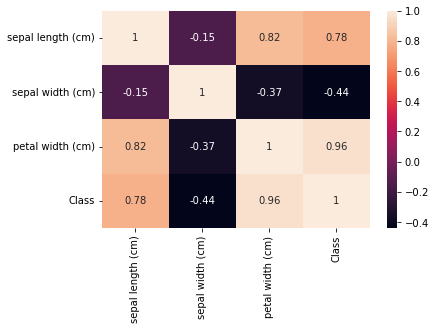

In [14]:
import seaborn as sns
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

from heatmap we can see " sepal length(cm)" and "pepal width(cm)" are highly correlated with feature "Class"

spliting the data into train and test dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=7,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)
(120,)
(30,)


In [17]:
import warnings
warnings.filterwarnings("ignore")

performing K-fold cross validation

In [18]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma="auto")))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random forest',RandomForestClassifier()))

for name,model in models:
    kfold=KFold(n_splits=10)
    cross_val_sc=cross_val_score(model,x,y,scoring='accuracy',cv=kfold)
    print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))

lr : acc: 0.9266666666666667(standard deviation: 0.08137703743822466)
decision tree : acc: 0.9200000000000002(standard deviation: 0.07774602526460399)
svm : acc: 0.9333333333333333(standard deviation: 0.07302967433402213)
knn : acc: 0.9333333333333333(standard deviation: 0.06666666666666665)
naive bayes : acc: 0.9400000000000001(standard deviation: 0.06289320754704401)
Random forest : acc: 0.9266666666666667(standard deviation: 0.08137703743822466)


training a logisticregression model for predeiction

also predicting classes for test data

In [19]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Evaluation of the model

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(confusion_matrix(y_test,y_pred))

[[7 0 0]
 [0 9 3]
 [0 2 9]]


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.82      0.75      0.78        12
           2       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.84      0.83      0.83        30

